## PROJECT TEAM ID : PTID-CDS-OCT-24-2098
## Project Ref: PM-PR-0019
## Client: Sales Effectiveness

# **Business Problem**

FicZon Inc. is facing challenges in maximizing sales effectiveness due to the manual and inconsistent categorization of leads. The current system relies heavily on the subjective judgment of the sales team, resulting in inefficiencies and missed opportunities, particularly when it comes to identifying high-potential leads. With the market becoming more competitive, FicZon needs a solution to automatically classify leads into high and low potential categories, enabling the sales team to focus on the most promising opportunities. The company seeks to leverage machine learning to automate lead categorization, improve conversion rates, and optimize sales efforts to drive revenue growth.


In [1]:
import os
import mysql.connector
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


# MAKING CONNECTION TO DATA BASE SERVER

In [2]:
try: 
    connection = mysql.connector.connect(
        host="18.136.157.135",          
        port=3306,                      
        user="dm_team2",                
        password="DM!$Team&27@9!20!",  
        database="project_sales"        
    )
    

    if connection.is_connected():
        print("✅ Successfully connected to the database.")

    # flech data from data base
    query ='SELECT * FROM data'
    data = pd.read_sql(query,connection)
    print(f"✅ Fetched {len(data)} rows from the table.")


    # Clean the data by removing special characters
    data=data.replace(r"[\£#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]", "", regex=True)
    print("✅ Cleaned data successfully.")


     #  Preview the cleaned data
    print(data.head())

except Error as e:
    print(f"❌ Error occurred: {e}")

except Exception as ex:
    print(f"❌ Unexpected error: {ex}")

finally:
    # Step 5: Close the connection
    if 'connection' in locals() and connection.is_connected():
        connection.close()
        print("✅ Database connection closed.")


✅ Successfully connected to the database.
✅ Fetched 7422 rows from the table.
✅ Cleaned data successfully.
            Created Product_ID   Source      Mobile               EMAIL  \
0  14-11-2018 10:05             Website  984XXXXXXX  aXXXXXXX@gmail.com   
1  14-11-2018 09:22             Website     XXXXXXX             #VALUE!   
2  14-11-2018 09:21             Website     XXXXXXX  dXXXXXXX@yahoo.com   
3  14-11-2018 08:46             Website     XXXXXXX  wXXXXXXX@gmail.com   
4  14-11-2018 07:34             Website     XXXXXXX  cXXXXXXX@gmail.com   

      Sales_Agent Location Delivery_Mode Status  
0  Sales-Agent-11                 Mode-5   Open  
1  Sales-Agent-10                 Mode-5   Open  
2  Sales-Agent-10                 Mode-5   Open  
3  Sales-Agent-10                 Mode-5   Open  
4  Sales-Agent-10                 Mode-5   Open  
✅ Database connection closed.


# **Domain Analysis**

1. **Created**: Represents the timestamp when the record was created, helping to track trends and the age of entries in the system.

2. **Product_ID**: Identifies the product associated with the record, enabling analysis of product-specific demand and performance.

3. **Source**: Indicates the origin or channel through which the lead was generated, providing insights into the effectiveness of various marketing channels.

4. **Mobile**: Represents the mobile phone number associated with the record, which can be used for direct communication and analyzing engagement.

5. **EMAIL**: Stores the email address associated with the record, facilitating email-based outreach, communication, and marketing campaigns.

6. **Sales_Agent**: Identifies the individual responsible for managing the lead or record, useful for tracking performance and optimizing sales strategies.

7. **Location**: Represents the geographic location of the record, helping with segmentation, targeted strategies, and regional performance analysis.

8. **Delivery_Mode**: Indicates the method through which the product or service will be delivered, assisting in logistics planning and customer preference analysis.

9. **Status**: Defines the current stage or state of the record in the process, providing insights into its progress and helping prioritize follow-up actions.


# BASIC CHECKS

In [3]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open


In [4]:
data.tail()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry
7421,28-04-2018 07:54,25,Website,,cXXXXXXX@gmail.com,Sales-Agent-3,Chennai,Mode-1,CONVERTED


In [5]:
data.columns

Index(['Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent',
       'Location', 'Delivery_Mode', 'Status'],
      dtype='object')

* The dataset has 9 features, of which 3 have unique values.


In [6]:
data.shape

(7422, 9)

* The dataset contains 7422 rows and 9 columns.


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Created        7422 non-null   object
 1   Product_ID     7422 non-null   object
 2   Source         7422 non-null   object
 3   Mobile         7422 non-null   object
 4   EMAIL          7422 non-null   object
 5   Sales_Agent    7422 non-null   object
 6   Location       7422 non-null   object
 7   Delivery_Mode  7422 non-null   object
 8   Status         7422 non-null   object
dtypes: object(9)
memory usage: 522.0+ KB


* All columns in the dataset are of object data type 

In [8]:
data.describe(include="O")

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
count,7422,7422,7422,7422,7422,7422,7422,7422,7422
unique,6752,30,26,487,883,13,18,5,11
top,26-09-2018 11:30,18,Call,,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,4,1711,2547,1810,1701,1500,2500,2975,1536


- **'Created'**: 7422 records, 6752 unique timestamps, most frequent value "26-09-2018 11:30" (appears 4 times).
- **'Product_ID'**: 7422 records, 30 unique product IDs, most frequent value "18" (appears 1711 times).
- **'Source'**: 7422 records, 26 unique sources, most frequent value "Call" (appears 2547 times).
- **'Mobile'**: 7422 records, 487 unique mobile numbers, most frequent value (empty) (appears 1810 times).
- **'EMAIL'**: 7422 records, 883 unique emails, most frequent value "#VALUE!" (appears 1701 times).
- **'Sales_Agent'**: 7422 records, 13 unique sales agents, most frequent value "Sales-Agent-4" (appears 1500 times).
- **'Location'**: 7422 records, 18 unique locations, most frequent value "Other Locations" (appears 2500 times).
- **'Delivery_Mode'**: 7422 records, 5 unique delivery modes, most frequent value "Mode-5" (appears 2975 times).
- **'Status'**: 7422 records, 11 unique statuses, most frequent value "Junk Lead" (appears 1536 times).


# **EXPLOTARY** **DATA** **ANALYSIS**

# UNIVARIATE ANALYSIS

In [9]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open


## Product_ID

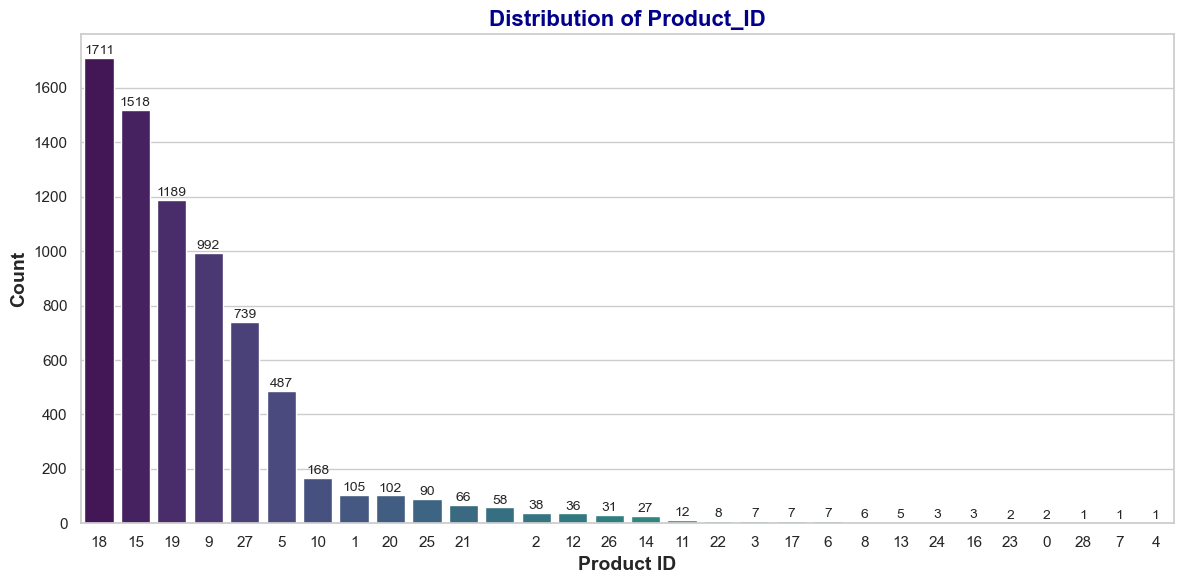

In [10]:

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.countplot(x=data['Product_ID'], palette='viridis', order=data['Product_ID'].value_counts().index)

plt.title("Distribution of Product_ID", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Product ID", fontsize=14, fontweight='bold')
plt.ylabel("Count", fontsize=14, fontweight='bold')
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()


**OBSERVATION:**

The dataset shows that a few products, such as `18`, `15`, and `19`, are highly frequent, with counts of 1711, 1518, and 1189, respectively. In contrast, some products, like `4`, `7`, and `28`, appear only once, and there are 58 blank entries in the data.



## Source	

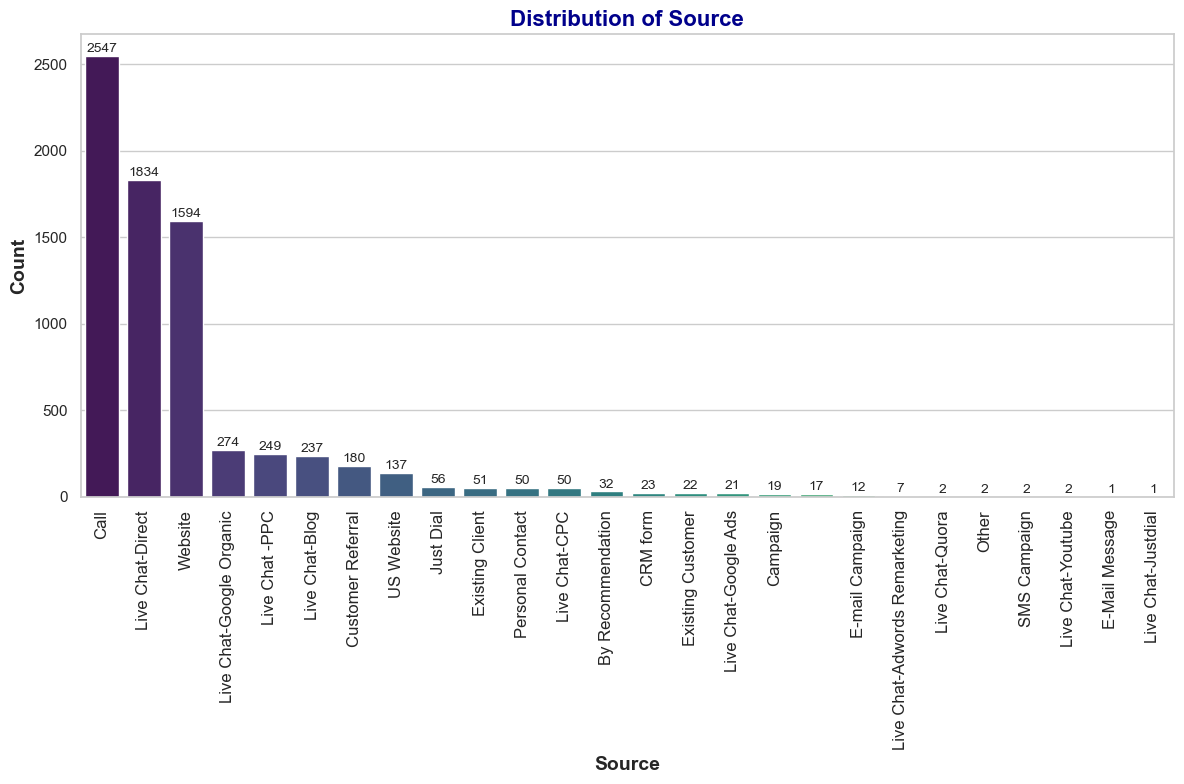

In [11]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8))
ax = sns.countplot(x=data['Source'], palette='viridis', order=data['Source'].value_counts().index)

plt.title("Distribution of Source", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Source", fontsize=14, fontweight='bold')
plt.ylabel("Count", fontsize=14, fontweight='bold')
plt.xticks(rotation=90, fontsize=12)

for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()


**OBSERVATION:**

The most common sources of interactions are Call (2547 occurrences), Live Chat-Direct (1834 occurrences), and Website (1594 occurrences). Other sources, such as Live Chat-Quora, E-Mail Message, and Live Chat-Justdial, have very few occurrences, with only 1 or 2 each. Additionally, there are some null occurrences which indicate missing or untracked source data. A significant portion of the interactions is dominated by Live Chat and Direct interactions.


## Sales_Agent

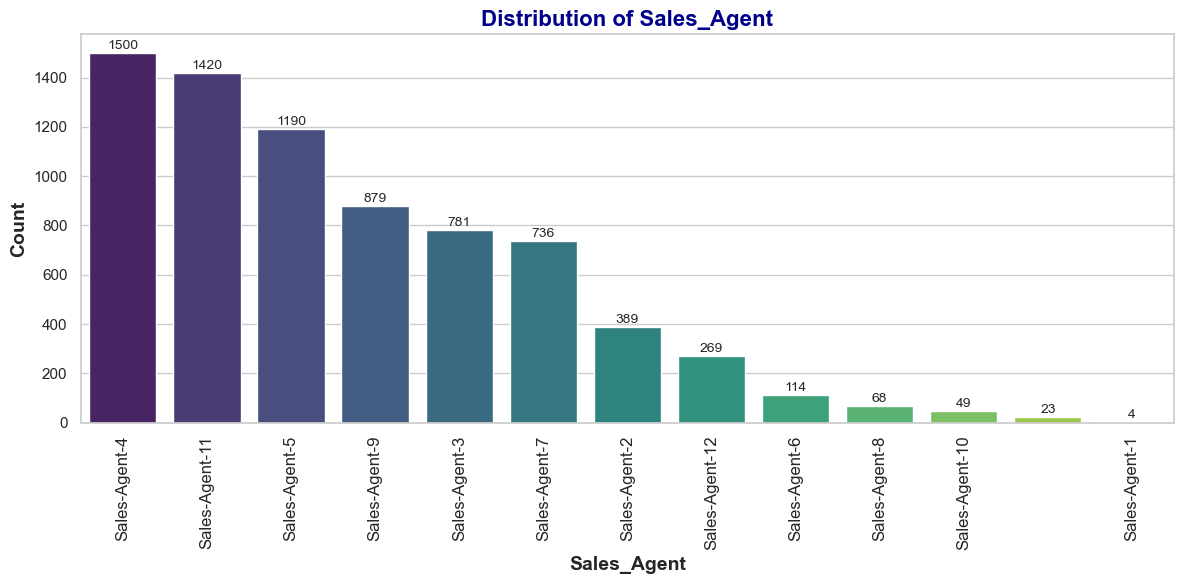

In [12]:

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.countplot(x=data['Sales_Agent'], palette='viridis', order=data['Sales_Agent'].value_counts().index)

plt.title("Distribution of Sales_Agent", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Sales_Agent", fontsize=14, fontweight='bold')
plt.ylabel("Count", fontsize=14, fontweight='bold')
plt.xticks(rotation=90, fontsize=12)

for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()


**OBSERVATION:**

Sales-Agent-4, Sales-Agent-11, and Sales-Agent-5 are the top performers with over 1000 interactions, while Sales-Agent-1 has the lowest with just 4 interactions. Additionally, there are 23 untracked interactions.





# Location

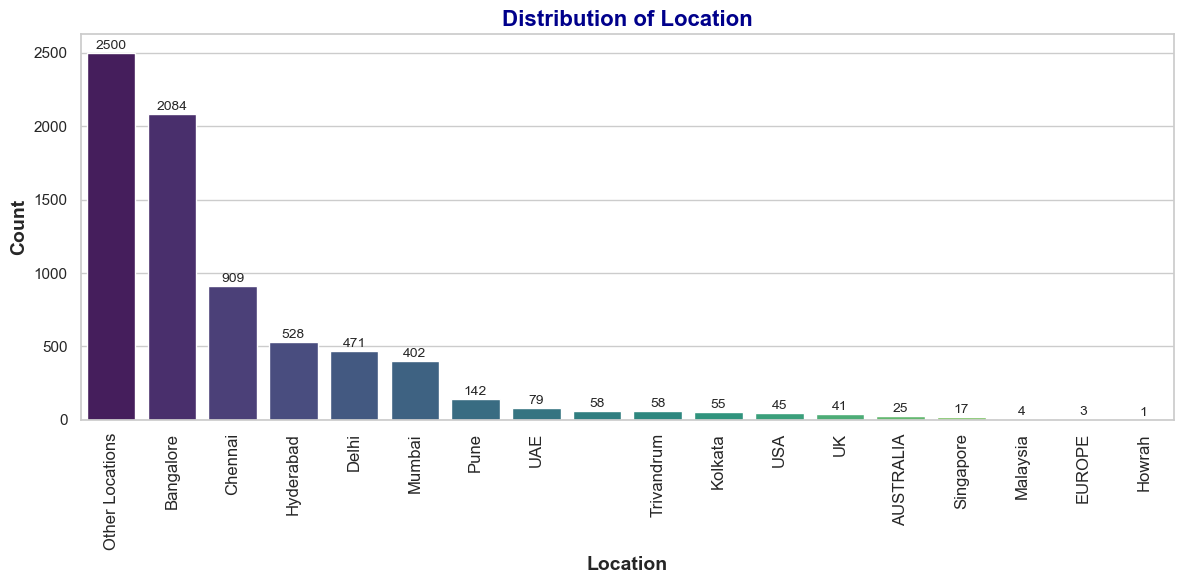

In [13]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.countplot(x=data['Location'], palette='viridis', order=data['Location'].value_counts().index)

plt.title("Distribution of Location", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Location", fontsize=14, fontweight='bold')
plt.ylabel("Count", fontsize=14, fontweight='bold')
plt.xticks(rotation=90, fontsize=12)

for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()


**OBSERVATION:**

"Other Locations" leads with 2500 interactions, followed by Bangalore (2084) and Chennai (909), while smaller locations like Howrah (1) and Europe (3) have minimal occurrences. Additionally, there are 58 untracked interactions.


# Delivery_Mode	

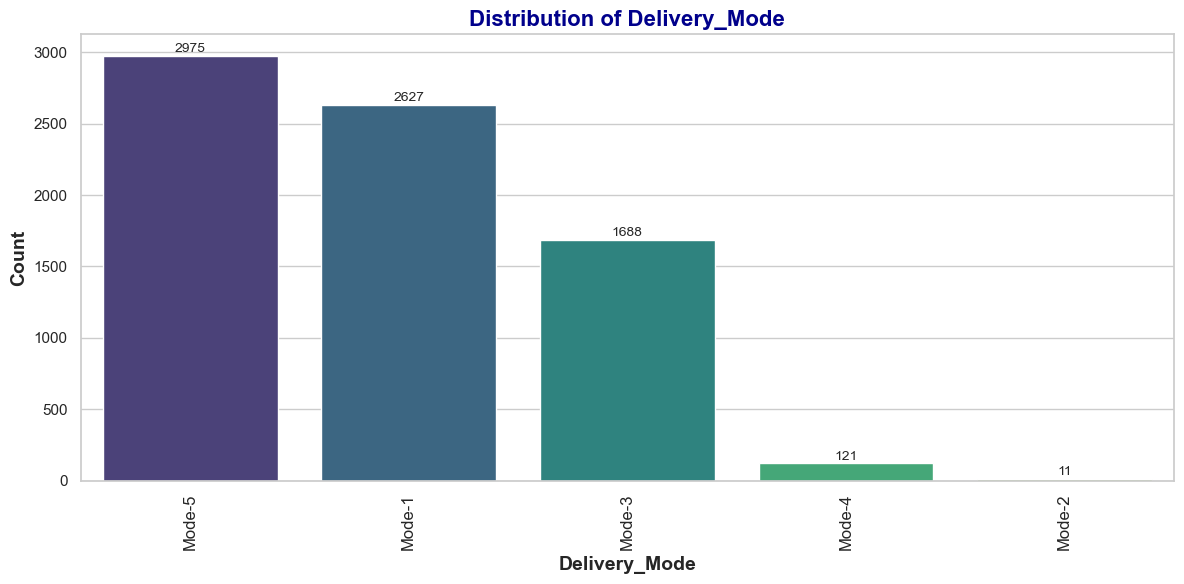

In [14]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.countplot(x=data['Delivery_Mode'], palette='viridis', order=data['Delivery_Mode'].value_counts().index)

plt.title("Distribution of Delivery_Mode", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Delivery_Mode", fontsize=14, fontweight='bold')
plt.ylabel("Count", fontsize=14, fontweight='bold')
plt.xticks(rotation=90, fontsize=12)

for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()

**OBSERVATION:**

Mode-5 is the most common delivery mode with 2975 occurrences, followed by Mode-1 with 2627. Modes 3, 4, and 2 have significantly fewer occurrences, with Mode-2 having only 11.


# Status

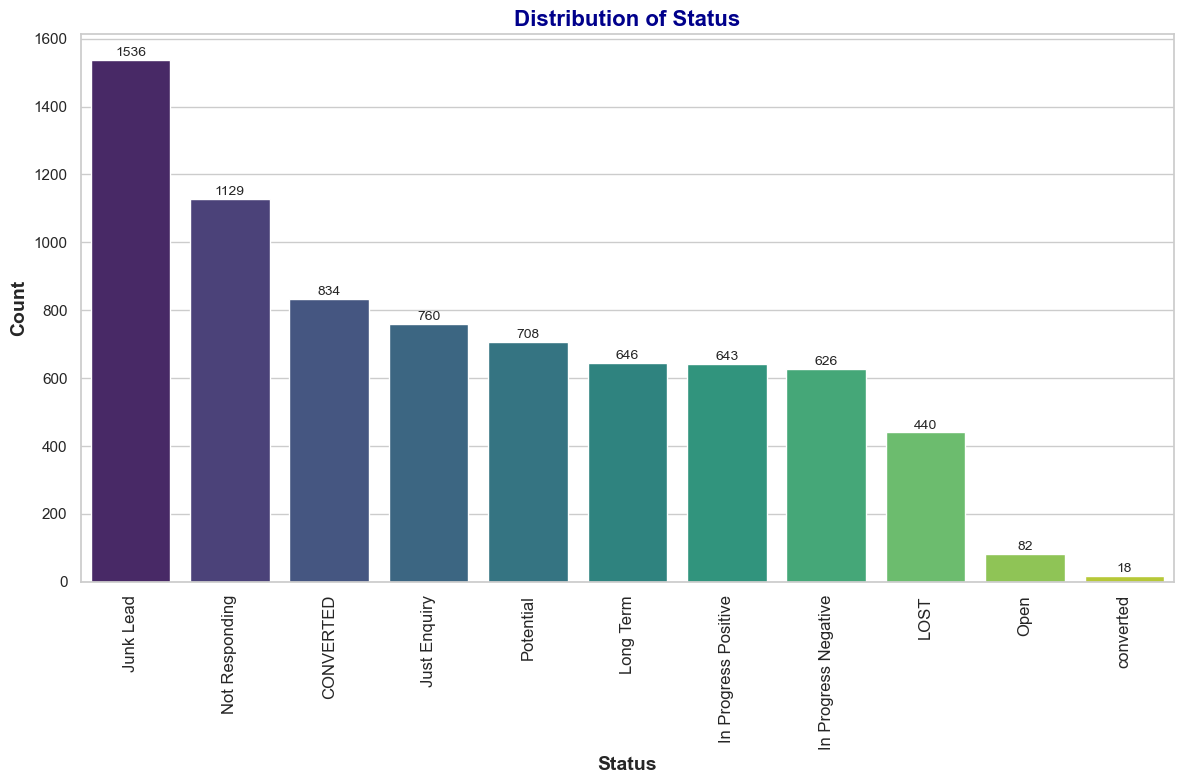

In [15]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8))
ax = sns.countplot(x=data['Status'], palette='viridis', order=data['Status'].value_counts().index)

plt.title("Distribution of Status", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Status", fontsize=14, fontweight='bold')
plt.ylabel("Count", fontsize=14, fontweight='bold')
plt.xticks(rotation=90, fontsize=12)

for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()

**OBSERVATION:**

The most common status is "Junk Lead" (1536), followed by "Not Responding" (1129) and "CONVERTED" (834). Other statuses like "converted" (18) and "Open" (82) have much fewer occurrences.


# Bivarient Analysis

In this section, we will compare each independent variable to the dependent variable to identify any characteristics or relationships between them.

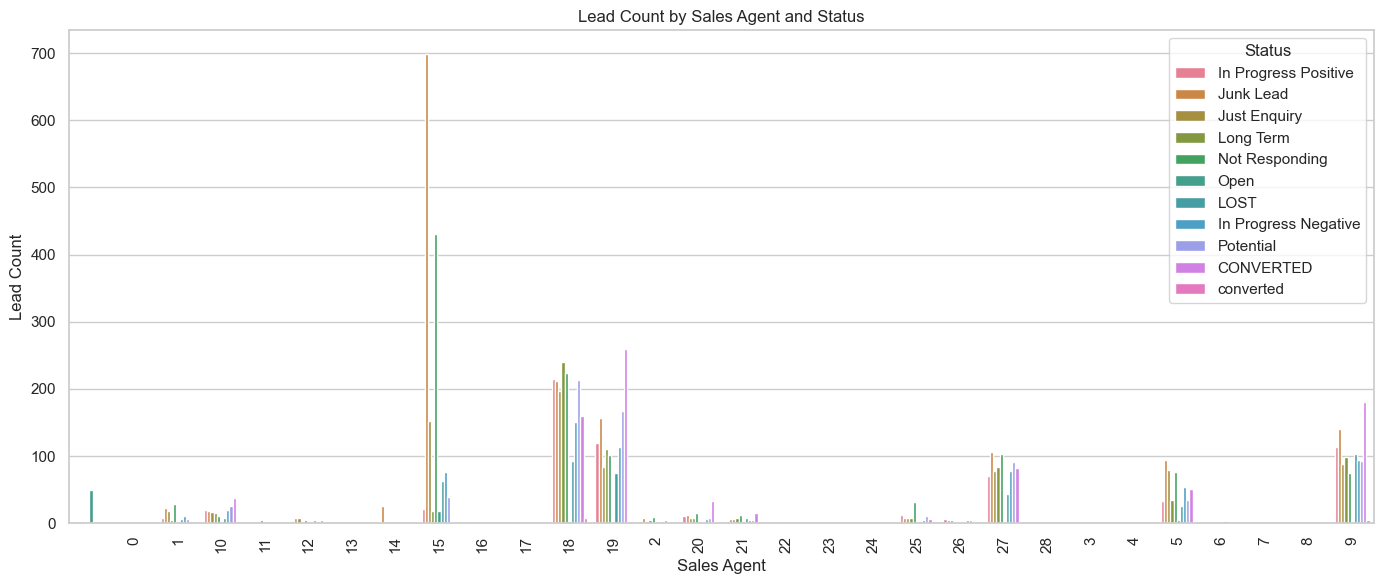

In [16]:

grouped = data.groupby(['Product_ID', 'Status']).size().reset_index(name='Count')

plt.figure(figsize=(14, 6))
sns.barplot(data=grouped, x='Product_ID', y='Count', hue='Status')

plt.title('Lead Count by Sales Agent and Status')
plt.xlabel('Sales Agent')
plt.ylabel('Lead Count')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()


### Insights:
- **Top performers**: **Product 19**, **Product 18**, and **Product 10** have the highest number of **"CONVERTED"** leads.
- **Struggling products**: **Product 15** has a large number of **"Junk Lead"** and **"Not Responding"**.
- **Mixed results**: **Product 27** has a balanced distribution of lead statuses.
- **Low activity**: **Product 22** and **Product 24** show minimal activity across lead statuses.
- **Long-term focus**: **Product 18** has the most **"Potential"** leads, indicating possible future conversions.

### **Summary**:
- **Best products**: **Product 19**, **Product 18**, and **Product 10**.
- **Need improvement**: **Product 15**, **Product 22**, and **Product 24**.



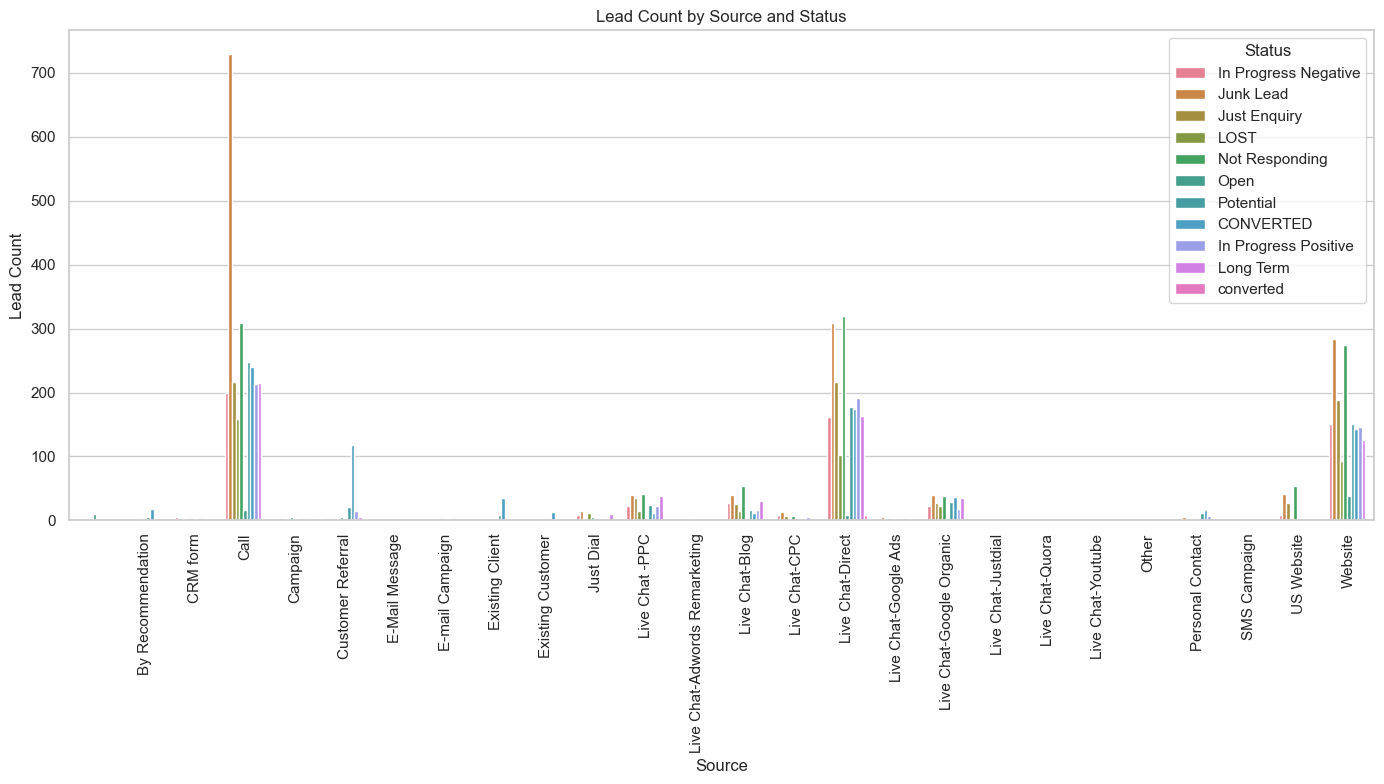

In [17]:
grouped = data.groupby(["Source","Status"]).size().reset_index(name="count")

plt.figure(figsize=(14,8))
sns.barplot(data=grouped,x="Source",y="count",hue="Status")

plt.title("Lead Count by Source and Status")
plt.xlabel("Source")
plt.ylabel("Lead Count")
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

### Insights:
- **Top performers**: **Call** and **Website** sources are converting leads well, with **Call** leading at 240 converted leads and **Website** at 143.
- **Struggling sources**: **Just Dial** and **Live Chat-CPC** have many **Junk Lead** and **Not Responding** statuses, with **Just Dial** showing 15 Junk Leads and **Live Chat-CPC** having 13 Junk Leads.
- **Mixed results**: **CRM form** and **Customer Referral** have both positive and negative outcomes, showing a mixture of **Converted**, **Junk Lead**, and **Not Responding** statuses.
- **Low activity**: **SMS Campaign** and **Live Chat-Adwords Remarketing** have minimal engagement, with very few converted leads (1 each).
- **Long-term focus**: **Campaign** and **Live Chat-Google Organic** sources have significant **Long Term** lead statuses, with **Live Chat-Google Organic** showing 35 Long Term leads.

### **Summary**:
- **Best sources**: **Call** and **Website**.
- **Need improvement**: **Just Dial** and **Live Chat-CPC**.


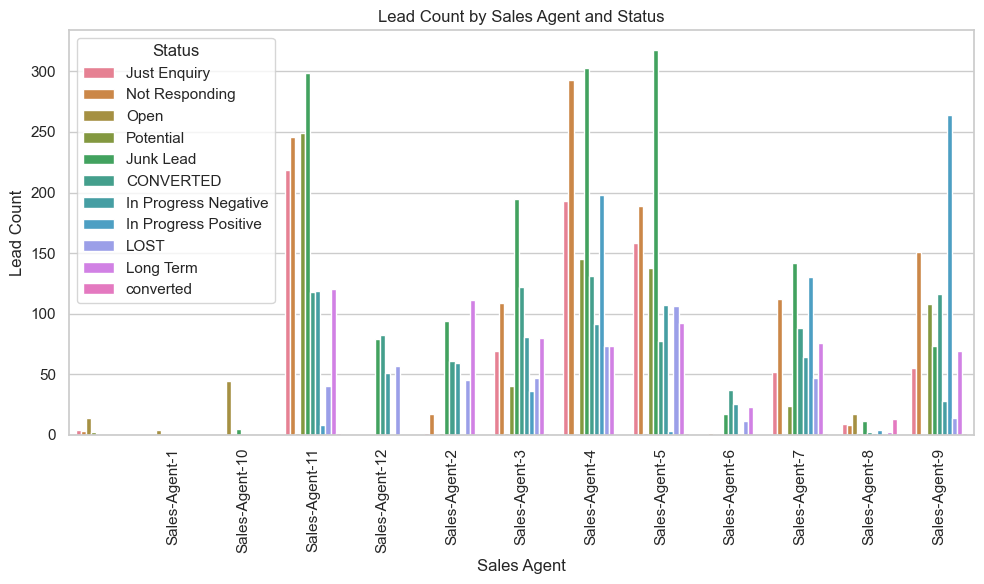

In [18]:
grouped = data.groupby(['Sales_Agent', 'Status']).size().reset_index(name='Count')


plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='Sales_Agent', y='Count', hue='Status')


plt.title('Lead Count by Sales Agent and Status')
plt.xlabel('Sales Agent')
plt.ylabel('Lead Count')
plt.xticks(rotation=90)
plt.tight_layout()


plt.show()

### Insights:
- **Top performers**: **Sales-Agent-9** and **Sales-Agent-7** are converting leads well.
- **Struggling agents**: **Sales-Agent-11** and **Sales-Agent-5** have many **"Junk Lead"** and **"Not Responding"** statuses.
- **Mixed results**: **Sales-Agent-4** handles both good and bad leads.
- **Low activity**: **Sales-Agent-8** shows minimal engagement.
- **Long-term focus**: **Sales-Agent-2** is working on leads that may convert later.

### **Summary**:
- **Best agents**: **Sales-Agent-9** and **Sales-Agent-7**.
- **Need improvement**: **Sales-Agent-11** and **Sales-Agent-5**.


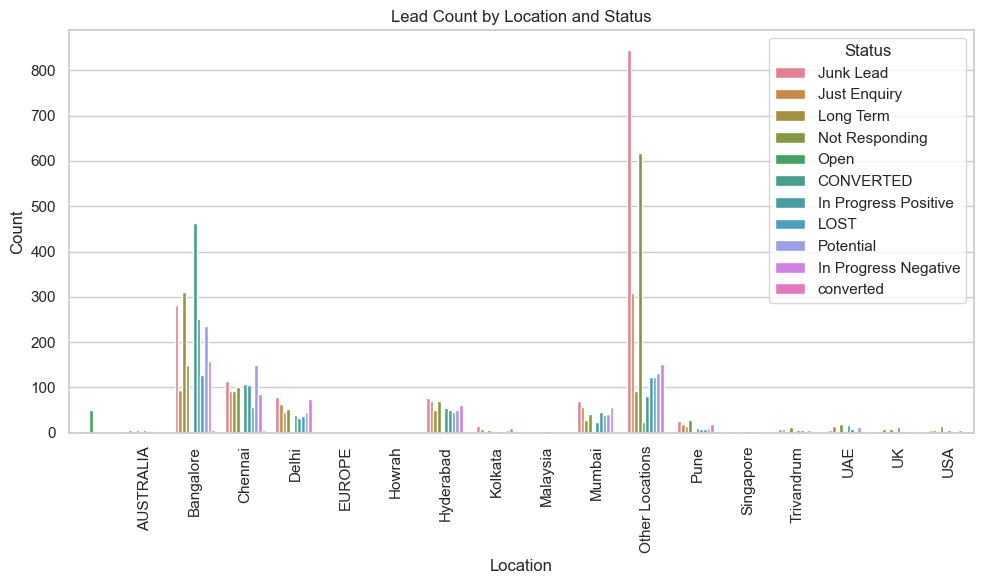

In [19]:
grouped = data.groupby(["Location","Status"]).size().reset_index(name="Count")
plt.figure(figsize=(10,6))
sns.barplot(data=grouped,x="Location",y="Count",hue="Status")

plt.title("Lead Count by Location and Status")
plt.xlabel("Location")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

### Insights:

- **Top Performers**:  
  - **Bangalore** is the top-performing location, with the highest number of **Converted** leads (464) and significant activity in other statuses such as **In Progress Positive** (252).
  - **Chennai** is also performing well with 108 **Converted** leads and strong engagement in **In Progress Positive** (105) and **Potential** (150).

- **Struggling Locations**:  
  - **Other Locations** has a high number of **Junk Leads** (846) and **Not Responding** leads (617), indicating challenges in lead qualification or follow-up.
  - **Delhi** and **Mumbai** also have a mix of **Junk Leads** and **Not Responding** statuses, with comparatively fewer **Converted** leads.

- **High Potential Locations**:  
  - **Bangalore**, **Chennai**, and **Hyderabad** show significant **Potential** leads, indicating that there are future opportunities for conversions.
  - **Singapore** and **Malaysia** have some **Potential** leads, but they still need further nurturing.

- **Long-term Focus**:  
  - **Bangalore** has a high number of **Long Term** leads (311), which suggests ongoing efforts for future conversions.
  - **Mumbai** and **Hyderabad** also show some **Long Term** leads, with **Mumbai** having 28 leads that may convert later.

- **Variation in Lead Engagement**:  
  - Locations like **Hyderabad** and **Mumbai** are working on a mix of lead types, from **Junk Leads** to **In Progress Positive**.
  - **Delhi** has a high number of **In Progress Negative** leads (75), pointing to potential issues in lead qualification or follow-up strategies.

### **Summary**:
- **Best Performing Locations**: **Bangalore**, **Chennai**, and **Hyderabad**.
- **Locations Needing Improvement**: **Other Locations**, **Delhi**, and **Mumbai**.


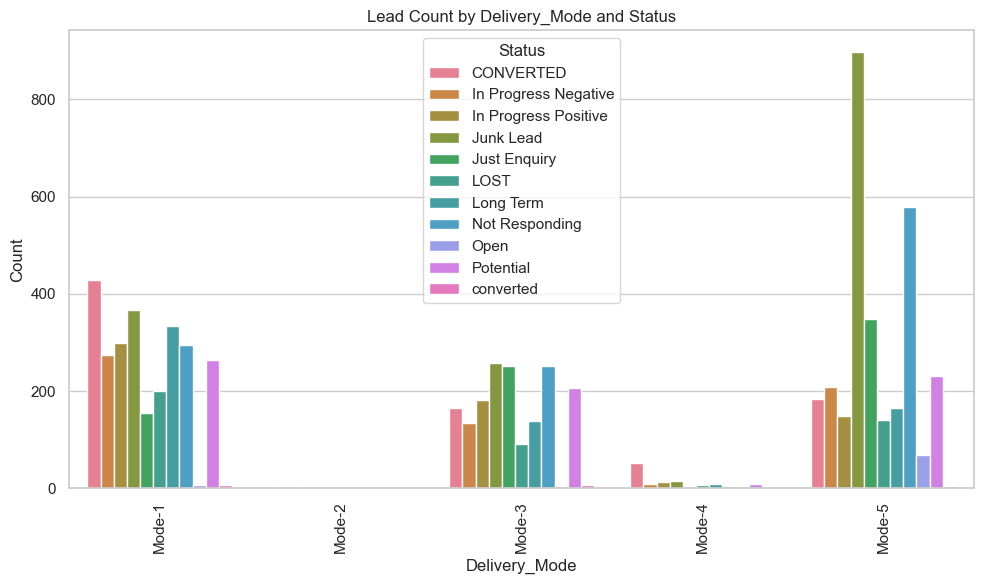

In [20]:
grouped = data.groupby(["Delivery_Mode","Status"]).size().reset_index(name="Count")
plt.figure(figsize=(10,6))
sns.barplot(data=grouped,x="Delivery_Mode",y="Count",hue="Status")

plt.title("Lead Count by Delivery_Mode and Status")
plt.xlabel("Delivery_Mode")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

### Insights:
- **Top performing delivery mode**:  
  - **Mode-1** is the strongest performer with the highest number of **Converted** leads (429) and strong performance in other categories like **In Progress Positive** (299), **Long Term** (333), and **Potential** (263).

- **Struggling delivery modes**:  
  - **Mode-5** shows a high number of **Junk Leads** (897) and **Not Responding** leads (578), indicating issues with lead qualification and follow-up.
  - **Mode-2** has very low engagement across all statuses, especially with just **3 Converted** leads and minimal activity in other statuses.

- **Mixed results**:  
  - **Mode-3** has a balance of **Converted** leads (165) and **Junk Leads** (257), along with significant **In Progress Negative** (134) and **Not Responding** (251) leads, which might need better management to boost conversions.
  - **Mode-4** shows relatively fewer leads in all categories but has **Converted** leads (53) and **Potential** (8), indicating some positive movement.

- **Low activity in some modes**:  
  - **Mode-2** shows minimal engagement, with **In Progress** leads and **Converted** leads being quite low.

### **Summary**:
- **Best delivery mode**: **Mode-1**.
- **Need improvement**: **Mode-2**, **Mode-5**.


# **FEATURE** **ENGINEERING**

## CHECKING MISSING VALUE

In [21]:
# Replace blank spaces to nan 
data.replace("",np.nan,inplace=True)
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open


In [22]:
data.isnull().sum()

Created             0
Product_ID         58
Source             17
Mobile           1810
EMAIL               0
Sales_Agent        23
Location           58
Delivery_Mode       0
Status              0
dtype: int64

- 5 features have missing values, including `Mobile` (unique feature).
- Missing values in other features are handled by filling with mode.
- `Mobile` is not handled due to its uniqueness.


## Product_ID

In [23]:
data['Product_ID'].mode()

0    18
Name: Product_ID, dtype: object

In [24]:
data.loc[data['Product_ID'].isnull(),'Product_ID']=18

# Source

In [25]:
data['Source'].mode()

0    Call
Name: Source, dtype: object

In [26]:
data.loc[data['Source'].isnull(),'Source']="Call"

# Sales_Agent  

In [27]:
data['Sales_Agent'].mode()

0    Sales-Agent-4
Name: Sales_Agent, dtype: object

In [28]:
data.loc[data['Sales_Agent'].isnull(),'Sales_Agent']="Sales-Agent-4"

# Location

In [29]:
data["Location"].mode()

0    Other Locations
Name: Location, dtype: object

In [30]:
data.loc[data["Location"].isnull(),"Location"]="Other Locations"

In [31]:
data.isnull().sum()

Created             0
Product_ID          0
Source              0
Mobile           1810
EMAIL               0
Sales_Agent         0
Location            0
Delivery_Mode       0
Status              0
dtype: int64

In [32]:
df=data.copy()

## THE FEATURE CONTAINS MANY LABELS, WHICH WE COMPRESSED AND MERGED INTO BROADER CATEGORIES

In [33]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,18,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,Other Locations,Mode-5,Open
1,14-11-2018 09:22,18,Website,XXXXXXX,#VALUE!,Sales-Agent-10,Other Locations,Mode-5,Open
2,14-11-2018 09:21,18,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,Other Locations,Mode-5,Open
3,14-11-2018 08:46,18,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,Other Locations,Mode-5,Open
4,14-11-2018 07:34,18,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,Other Locations,Mode-5,Open


## Source

In [34]:


# Group the sources using replace method
data['Source'] = data['Source'].replace({
    'Live Chat-Google Organic': 'live chat',
    'Live Chat-Direct': 'live chat',
    'Live Chat-Blog': 'live chat',
    'Live Chat-PPC': 'live chat',
    'Live Chat-Google Ads': 'live chat',
    'Live Chat-Adwords Remarketing': 'live chat',
    'Live Chat-CPC': 'live chat',
    'Live Chat-Quora': 'live chat',
    'Live Chat-Youtube': 'live chat',
    'Live Chat-Justdial': 'live chat',
    'Website': 'website',
    'US Website': 'website',
    'Call': 'calls',
    'By Recommendation': 'referrals',
    'Customer Referral': 'referrals',
    'Existing Client': 'existing clients & personal contacts',
    'Existing Customer': 'referrals',
    'Just Dial': 'search engine & campaigns',
    'Campaign': 'search engine & campaigns',
    'Other': 'other',
    'E-mail Campaign': 'search engine & campaigns',
    'E-Mail Message': 'search engine & campaigns',
    'CRM form': 'other',
    'SMS Campaign': 'search engine & campaigns',
    'Personal Contact': 'existing clients & personal contacts'
})

data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,18,website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,Other Locations,Mode-5,Open
1,14-11-2018 09:22,18,website,XXXXXXX,#VALUE!,Sales-Agent-10,Other Locations,Mode-5,Open
2,14-11-2018 09:21,18,website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,Other Locations,Mode-5,Open
3,14-11-2018 08:46,18,website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,Other Locations,Mode-5,Open
4,14-11-2018 07:34,18,website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,Other Locations,Mode-5,Open


In [35]:
data['Source'].value_counts()

Source
calls                                   2564
live chat                               2428
website                                 1731
Live Chat -PPC                           249
referrals                                234
existing clients & personal contacts     101
search engine & campaigns                 90
other                                     25
Name: count, dtype: int64

## Location

In [36]:
data.Location.replace(['UAE','Malaysia','Singapore'],"Asia",inplace=True)
data.Location.replace(['USA','UK','AUSTRALIA','EUROPE'],'west country',inplace=True)
data.Location.replace(['Trivandrum', 'Kolkata', 'Howrah'],'Other Locations',inplace=True)

In [37]:
data['Location'].value_counts()

Location
Other Locations    2672
Bangalore          2084
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
Pune                142
west country        114
Asia                100
Name: count, dtype: int64

## Status

In [38]:
data['Status'].unique()

array(['Open', 'Potential', 'In Progress Positive', 'Not Responding',
       'Just Enquiry', 'Junk Lead', 'CONVERTED', 'In Progress Negative',
       'LOST', 'Long Term', 'converted'], dtype=object)

In [39]:
# We are categorizing the target variable into two groups based on potential
data.Status.replace(['Junk Lead','Not Responding','In Progress Negative','Just Enquiry','LOST'],'low potential',inplace=True)
data.Status.replace(['CONVERTED','Potential','Long Term','In Progress Positive','Open','converted'],'high potential',inplace=True)

In [40]:
data.Status.value_counts()

Status
low potential     4491
high potential    2931
Name: count, dtype: int64

## CATEGORICAL DATA CONVERSION

### Source

In [41]:
data.Source.value_counts()

Source
calls                                   2564
live chat                               2428
website                                 1731
Live Chat -PPC                           249
referrals                                234
existing clients & personal contacts     101
search engine & campaigns                 90
other                                     25
Name: count, dtype: int64

In [42]:
# Frequency Encoding

dict={"other":0,"search engine & campaigns":1,"existing clients & personal contacts":2,
      "referrals":3,"Live Chat -PPC":4,"website":5,"live chat":6,"calls":7}

data["Source"] = data["Source"].map(dict)

### Sales_Agent

In [43]:
data.Sales_Agent.value_counts()

Sales_Agent
Sales-Agent-4     1523
Sales-Agent-11    1420
Sales-Agent-5     1190
Sales-Agent-9      879
Sales-Agent-3      781
Sales-Agent-7      736
Sales-Agent-2      389
Sales-Agent-12     269
Sales-Agent-6      114
Sales-Agent-8       68
Sales-Agent-10      49
Sales-Agent-1        4
Name: count, dtype: int64

In [44]:
dict={"Sales-Agent-1":0,"Sales-Agent-10":1,"Sales-Agent-8":2,"Sales-Agent-6":3,"Sales-Agent-12":4,"Sales-Agent-2":5,"Sales-Agent-7":6,
      "Sales-Agent-3":7,"Sales-Agent-9":8,"Sales-Agent-5":9,"Sales-Agent-11":10,"Sales-Agent-4":11}


data["Sales_Agent"] = data["Sales_Agent"].map(dict)

### Location	

In [45]:
data.Location.value_counts()

Location
Other Locations    2672
Bangalore          2084
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
Pune                142
west country        114
Asia                100
Name: count, dtype: int64

In [46]:
# frequency encoding

dict = {"Asia":0,"west country":1,"Pune":2,"Mumbai":3,"Delhi":4,
        "Hyderabad":5,"Chennai":6,"Bangalore":7,"Other Locations":8}

data["Location"] = data["Location"].map(dict)

### Delivery_Mode

In [47]:
data.Delivery_Mode.value_counts()

Delivery_Mode
Mode-5    2975
Mode-1    2627
Mode-3    1688
Mode-4     121
Mode-2      11
Name: count, dtype: int64

In [48]:
# frequency encoding
dict = {"Mode-2":0,"Mode-4":1,"Mode-3":2,"Mode-1":3,"Mode-5":4}

data["Delivery_Mode"] = data["Delivery_Mode"].map(dict)

### Status

In [49]:
data.Status.value_counts()

Status
low potential     4491
high potential    2931
Name: count, dtype: int64

In [50]:

dict = {"high potential": 0, "low potential": 1}

data["Status"] = data["Status"].map(dict).astype(int)


In [51]:
from datetime import datetime
data['Created'] = pd.to_datetime(data['Created'], format='%d-%m-%Y %H:%M')

data["Day"] = data["Created"].dt.day
data["Month"] = data["Created"].dt.month
data["Year"] = data["Created"].dt.year

data["Hour"] = data["Created"].dt.hour
data["Minute"] = data["Created"].dt.minute

In [52]:
data["Product_ID"] = data["Product_ID"].astype(int)

# **FEATURE** **SELECTION**


## Drop Unique and Constant Columns




In [53]:
data.drop(["Created","Mobile","EMAIL","Year"],axis=1,inplace=True)

In [54]:
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Hour,Minute
0,18,5,10,8,4,0,14,11,10,5
1,18,5,1,8,4,0,14,11,9,22
2,18,5,1,8,4,0,14,11,9,21
3,18,5,1,8,4,0,14,11,8,46
4,18,5,1,8,4,0,14,11,7,34


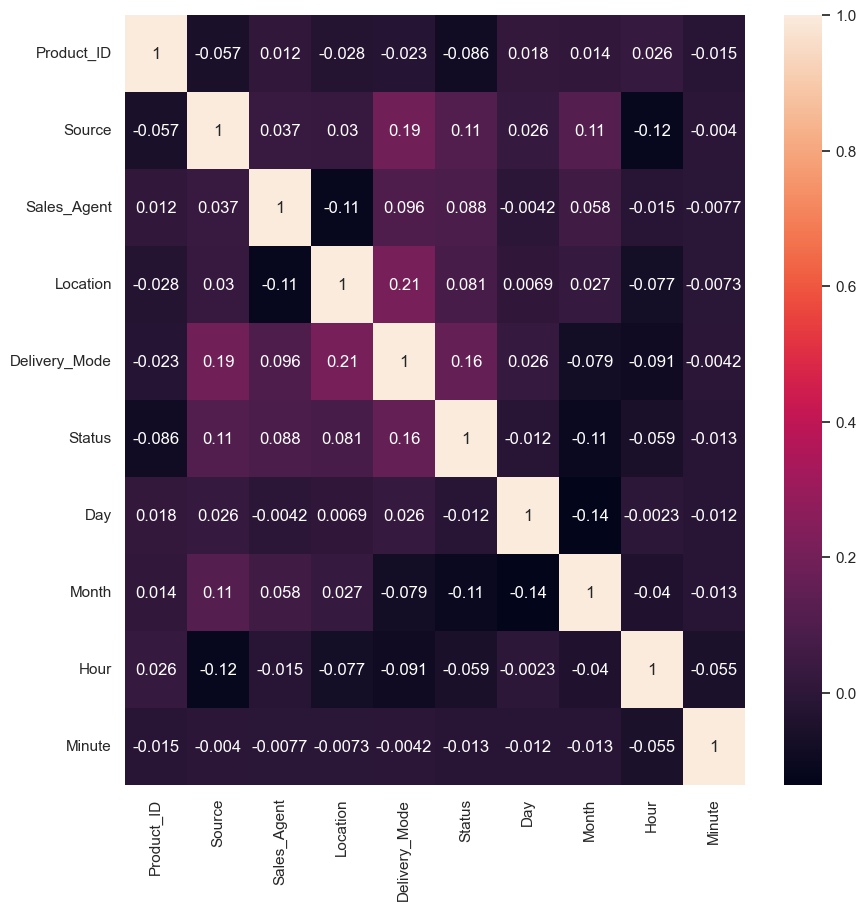

In [55]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True)
plt.show()

* No highly correlated feature available.

# **MODEL** **CREATION**

# **Experimenting with Seven Powerful Machine Learning Algorithms for Classification**

In this experiment, we will implement and compare the performance of **seven powerful classification algorithms**. Each algorithm has unique characteristics, and understanding their strengths can help us choose the best one for a given task. The algorithms we will explore are:

1. **Logistic Regression**
2. **K-Nearest Neighbors (KNN) Classifier**
3. **Decision Tree Classifier**
4. **Random Forest Classifier**
5. **XGBoost Classifier**
6. **Adaboost Classifier**
7. **Gradient Boosting Classifier**

---

### DEFINE INDEPENDANT AND DEPENDANT VERIABLE

In [56]:
X = data[['Product_ID', 'Source', 'Sales_Agent', 'Location', 'Delivery_Mode',
       'Day', 'Month', 'Hour', 'Minute']]
y = data["Status"]

### SPLIT DARA INTO TRAINING AND TESTING 

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [58]:
y_train.value_counts()

Status
1    3601
0    2336
Name: count, dtype: int64

### BALANCING THE TARGET COLUMN USING SMOTE

In [59]:
from collections import Counter
from imblearn.over_sampling import SMOTE
sm =  SMOTE()
print(f"UNBALANCE DATA : {Counter(y_train)}")
X_smote, y_smote = sm.fit_resample(X_train, y_train)
print(f"BALANCED DATA : {Counter(y_smote)}")

UNBALANCE DATA : Counter({1: 3601, 0: 2336})
BALANCED DATA : Counter({0: 3601, 1: 3601})


# 1. **Logistic Regression**

In [60]:
# Step:1 importing library
from sklearn.linear_model import LogisticRegression

# Step:2 Object creation
log_reg = LogisticRegression(random_state=5)

# Step:3 fitting the training data
log_reg.fit(X_smote,y_smote)

# Step:4 Prediction on test data
log_test_predict = log_reg.predict(X_test)

# Step:5 Prediction on training data
log_train_predict = log_reg.predict(X_smote)


### TRAINING ACCURACY

In [61]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report,confusion_matrix
log_train_accuracy = round(accuracy_score(log_train_predict,y_smote),2)
print("Training accuracy of Logistic regression model",log_train_accuracy*100)
print("Logistic regression training Classification report: \n",classification_report(log_train_predict,y_smote))

Training accuracy of Logistic regression model 62.0
Logistic regression training Classification report: 
               precision    recall  f1-score   support

           0       0.63      0.62      0.62      3648
           1       0.62      0.62      0.62      3554

    accuracy                           0.62      7202
   macro avg       0.62      0.62      0.62      7202
weighted avg       0.62      0.62      0.62      7202



### TEST ACCURACY

In [62]:
log_test_accuracy = accuracy_score(log_test_predict,y_test)
print("Testing accuracy of Logistic regression model",log_test_accuracy*100)
print("Logistic regression testing Classification report: \n",classification_report(log_test_predict,y_test))

Testing accuracy of Logistic regression model 59.46127946127946
Logistic regression testing Classification report: 
               precision    recall  f1-score   support

           0       0.59      0.50      0.54       707
           1       0.60      0.69      0.64       778

    accuracy                           0.59      1485
   macro avg       0.59      0.59      0.59      1485
weighted avg       0.59      0.59      0.59      1485



## 2. **K-Nearest Neighbors (KNN) Classifier**

In [63]:
from sklearn.neighbors import KNeighborsClassifier

error_rate = []
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_smote,y_smote)
    y_knn_predict = knn.predict(X_test)
    error_rate.append(np.mean(y_knn_predict != y_test))
print("Error rate : ",error_rate)

Error rate :  [0.38855218855218854, 0.42693602693602695, 0.3939393939393939, 0.4074074074074074, 0.38922558922558925, 0.39730639730639733, 0.3838383838383838, 0.4006734006734007, 0.3838383838383838, 0.40404040404040403]


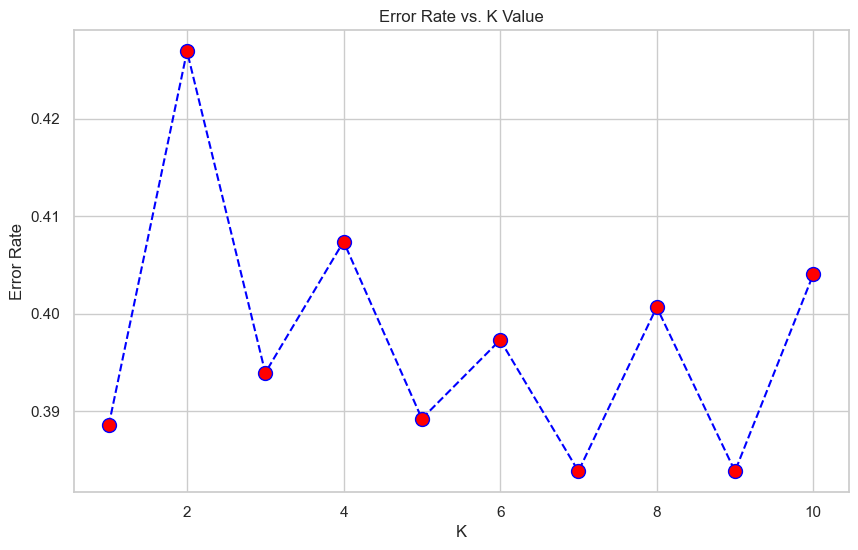

In [64]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()


In [65]:
knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(X_smote,y_smote)
knn_test_predict = knn1.predict(X_test)
knn_train_predict = knn1.predict(X_smote)

### TRAINING ACCURACY

In [66]:
knn_train_accuracy = accuracy_score(y_smote,knn_train_predict)
print("Training accuracy of knn model ",round(knn_train_accuracy*100,2))
print("Training classification report:\n",classification_report(knn_train_predict,y_smote))

Training accuracy of knn model  79.33
Training classification report:
               precision    recall  f1-score   support

           0       0.88      0.75      0.81      4200
           1       0.71      0.85      0.77      3002

    accuracy                           0.79      7202
   macro avg       0.79      0.80      0.79      7202
weighted avg       0.81      0.79      0.79      7202



### TESTING ACCURACY

In [67]:
knn_test_accuracy = accuracy_score(y_test,knn_test_predict)
print("Testing accuracy of knn model",round(knn_test_accuracy*100,2))
print("Testing classification report: \n",classification_report(y_test,knn_test_predict))

Testing accuracy of knn model 61.08
Testing classification report: 
               precision    recall  f1-score   support

           0       0.51      0.61      0.56       595
           1       0.70      0.61      0.65       890

    accuracy                           0.61      1485
   macro avg       0.61      0.61      0.60      1485
weighted avg       0.63      0.61      0.61      1485



## Hyperparameter Tunning Of KNN

In [68]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [i for i in range(3, 11)],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'leaf_size': [20, 30, 40]
}

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)

grid_search.fit(X_smote, y_smote)

print("Best hyperparameters found: ", grid_search.best_params_)

knn_best = grid_search.best_estimator_

knn_test_predict = knn_best.predict(X_test)

knn_test_accuracy = accuracy_score(y_test, knn_test_predict)
print(f"Testing accuracy of tuned KNN model: {round(knn_test_accuracy * 100, 1)}%")

print("Testing classification report: \n", classification_report(y_test, knn_test_predict))


Fitting 3 folds for each of 144 candidates, totalling 432 fits
Best hyperparameters found:  {'leaf_size': 20, 'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}
Testing accuracy of tuned KNN model: 63.0%
Testing classification report: 
               precision    recall  f1-score   support

           0       0.53      0.61      0.57       595
           1       0.71      0.64      0.68       890

    accuracy                           0.63      1485
   macro avg       0.62      0.63      0.62      1485
weighted avg       0.64      0.63      0.63      1485



## 3. **Decision** **Tree** **Classifier**

In [69]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5)

dtc.fit(X_smote,y_smote)

dtc_test_predict = dtc.predict(X_test)
dtc_train_predict = dtc.predict(X_smote)

### TRAINING ACCURACY

In [70]:
dtc_train_accuracy = accuracy_score(y_smote,dtc_train_predict)
print("Training accuracy of Decision tree classifier:",round(dtc_train_accuracy*100,2))
print("classification report of training:"'\n',classification_report(y_smote,dtc_train_predict))

Training accuracy of Decision tree classifier: 71.61
classification report of training:
               precision    recall  f1-score   support

           0       0.68      0.80      0.74      3601
           1       0.76      0.63      0.69      3601

    accuracy                           0.72      7202
   macro avg       0.72      0.72      0.71      7202
weighted avg       0.72      0.72      0.71      7202



In [71]:
dtc_test_accuracy = accuracy_score(y_test,dtc_test_predict)
print("Testing accuracy of Decision tree classifier:",dtc_test_accuracy*100)
print("classification report of testing:"'\n',classification_report(y_test,dtc_test_predict))

Testing accuracy of Decision tree classifier: 68.61952861952862
classification report of testing:
               precision    recall  f1-score   support

           0       0.59      0.74      0.65       595
           1       0.79      0.65      0.71       890

    accuracy                           0.69      1485
   macro avg       0.69      0.69      0.68      1485
weighted avg       0.71      0.69      0.69      1485



## HYPER PARAMETER TUNNING OF DESION TREE CLASSIFIER

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

params = {
    "criterion": ("gini", "entropy"),
    "splitter": ("best", "random"),
    "max_depth": [i for i in range(1, 30)],
    "min_samples_split": [2, 3, 4, 5],
    "min_samples_leaf": list(range(1, 10)),
}

tree_c = DecisionTreeClassifier(random_state=3)
tree_cv = GridSearchCV(tree_c, params, scoring="f1", n_jobs=-1, verbose=2, cv=3)
tree_cv.fit(X_smote, y_smote)

best_dt = tree_cv.best_estimator_
best_params = tree_cv.best_params_
print(f"Best parameters: {best_params}")

y_pred = best_dt.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))



Fitting 3 folds for each of 4176 candidates, totalling 12528 fits
Best parameters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'best'}
Accuracy Score: 0.696969696969697
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.71      0.65       595
           1       0.78      0.69      0.73       890

    accuracy                           0.70      1485
   macro avg       0.69      0.70      0.69      1485
weighted avg       0.71      0.70      0.70      1485



## 4. **Random Forest Classifier**


In [73]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=50)
rf.fit(X_smote,y_smote)

rf_test_predict = rf.predict(X_test)

rf_train_predict = rf.predict(X_smote)

### TRAINING ACCURACY

In [74]:
rf_train_accuracy = accuracy_score(y_smote,rf_train_predict)
print("Training accuracy of random forest classifier:",rf_train_accuracy*100)
print("Classification report of training:"'\n',classification_report(y_smote,rf_train_predict))

Training accuracy of random forest classifier: 84.24048875312413
Classification report of training:
               precision    recall  f1-score   support

           0       0.80      0.91      0.85      3601
           1       0.89      0.78      0.83      3601

    accuracy                           0.84      7202
   macro avg       0.85      0.84      0.84      7202
weighted avg       0.85      0.84      0.84      7202



"**Random forest model well train on training data.**"

### TESTING ACCURACY

In [75]:
rf_test_accuracy = accuracy_score(y_test,rf_test_predict)
print("Testing accuracy of random forest classifier:",rf_test_accuracy*100)
print("Classification report of training:"'\n',classification_report(y_test,rf_test_predict))

Testing accuracy of random forest classifier: 71.31313131313132
Classification report of training:
               precision    recall  f1-score   support

           0       0.63      0.70      0.66       595
           1       0.78      0.72      0.75       890

    accuracy                           0.71      1485
   macro avg       0.71      0.71      0.71      1485
weighted avg       0.72      0.71      0.72      1485



### HYPER PARAMETER TUNNING OF RANDOM FOREST

In [76]:

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 3],
    "max_features": ["sqrt", "log2", None]
    
    
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)

grid_search.fit(X_smote, y_smote)

print(f"Best parameters from GridSearchCV: {grid_search.best_params_}")

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best parameters from GridSearchCV: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy Score: 0.703030303030303
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.64      0.63       595
           1       0.76      0.74      0.75       890

    accuracy                           0.70      1485
   macro avg       0.69      0.69      0.69      1485
weighted avg       0.70      0.70      0.70      1485



## **5.XGB Classifier**

In [77]:
import xgboost as xgb
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(n_estimators=5)
xgb_clf.fit(X_smote,y_smote)

xgb_test_predict = xgb_clf.predict(X_test)
xgb_train_predict = xgb_clf.predict(X_smote)

### TRAINING ACCURACY

In [78]:
xgboost_train_accuracy = accuracy_score(xgb_train_predict,y_smote)
print("Training accuracy of xgboost claasifer:",xgboost_train_accuracy*100)
print("Classification report of training:"'\n',classification_report(y_smote,xgb_train_predict))

Training accuracy of xgboost claasifer: 74.84032213274091
Classification report of training:
               precision    recall  f1-score   support

           0       0.72      0.81      0.76      3601
           1       0.78      0.69      0.73      3601

    accuracy                           0.75      7202
   macro avg       0.75      0.75      0.75      7202
weighted avg       0.75      0.75      0.75      7202



### TESTING ACCURACY

In [79]:
xgb_test_accuracy = accuracy_score(xgb_test_predict,y_test)
print("Testing accuracy of xgb model",xgb_test_accuracy*100)
print("Classification report on testing: \n",classification_report(xgb_test_predict,y_test))

Testing accuracy of xgb model 69.83164983164983
Classification report on testing: 
               precision    recall  f1-score   support

           0       0.71      0.61      0.65       695
           1       0.69      0.78      0.73       790

    accuracy                           0.70      1485
   macro avg       0.70      0.69      0.69      1485
weighted avg       0.70      0.70      0.70      1485



### HYPER PARAMETER TUNNING OF XGBOOST CLASSIFIER

In [80]:
param_grid = {
    "max_depth" : [5,10,15],
    "learning_rate":[0.01,0.1,0.3,1],
    "n_estimators":[50,100.200,300],
    "subsample":[0.2,0.8,1,1.5,2],
    "colsample_bytree":[0.8,1,2]
}

xgb_clf = xgb.XGBClassifier()
grid_search = GridSearchCV(estimator=xgb_clf,param_grid=param_grid,cv=5,n_jobs=-1,verbose=1,scoring='accuracy')

grid_search.fit(X_smote,y_smote)


print(f"Best parameters from GridSearchCV: {grid_search.best_params_}")

best_xgb =grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)

print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 540 candidates, totalling 2700 fits
Best parameters from GridSearchCV: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 300, 'subsample': 0.8}
Accuracy Score: 0.6942760942760943
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.59      0.61       595
           1       0.74      0.76      0.75       890

    accuracy                           0.69      1485
   macro avg       0.68      0.68      0.68      1485
weighted avg       0.69      0.69      0.69      1485



## **6.Adaboost Classifier**

In [81]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost = AdaBoostClassifier(n_estimators=100)
ada_boost.fit(X_smote,y_smote)

ada_test_predict = ada_boost.predict(X_test)
ada_train_predict = ada_boost.predict(X_smote)


## TRAINING ACCURACY

In [82]:
adaboost_train_accuracy = accuracy_score(ada_train_predict,y_smote)
print("Training accuracy of adaboost classifier :",round(adaboost_train_accuracy*100,2))
print("Classification report of training:"'\n',classification_report(y_smote,ada_train_predict))

Training accuracy of adaboost classifier : 73.17
Classification report of training:
               precision    recall  f1-score   support

           0       0.71      0.77      0.74      3601
           1       0.75      0.69      0.72      3601

    accuracy                           0.73      7202
   macro avg       0.73      0.73      0.73      7202
weighted avg       0.73      0.73      0.73      7202



## TESTING ACCURACY

In [83]:
adaboost_test_accuracy = accuracy_score(ada_test_predict,y_test)
print("Testing accuracy of xgb model",adaboost_test_accuracy*100)
print("Classification report on testing: \n",classification_report(ada_test_predict,y_test))

Testing accuracy of xgb model 70.70707070707071
Classification report on testing: 
               precision    recall  f1-score   support

           0       0.71      0.62      0.66       688
           1       0.70      0.79      0.74       797

    accuracy                           0.71      1485
   macro avg       0.71      0.70      0.70      1485
weighted avg       0.71      0.71      0.70      1485



## HYPER PARAMETER TUNNING OF ADABOOST CLASSIFIER

In [84]:
param_grid = {
    "n_estimators" : [50, 100, 150, 200],  
    "learning_rate" : [0.01, 0.1, 0.5, 1.0, 1.5],
    "base_estimator" : [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=3), None]
}

ada_boost = AdaBoostClassifier()

grid_search = GridSearchCV(estimator=ada_boost, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_smote,y_smote)

print(f"Best parameters from GridSearchCV: {grid_search.best_params_}")

best_ada_boost = grid_search.best_estimator_
y_test_pred = best_ada_boost.predict(X_test)

print(f"Test Accuracy Score of adaboost classifier after tunning : {accuracy_score(y_test,y_test_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters from GridSearchCV: {'base_estimator': DecisionTreeClassifier(max_depth=3), 'learning_rate': 0.1, 'n_estimators': 100}
Test Accuracy Score of adaboost classifier after tunning : 0.7043771043771043
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.72      0.66       595
           1       0.79      0.69      0.74       890

    accuracy                           0.70      1485
   macro avg       0.70      0.71      0.70      1485
weighted avg       0.72      0.70      0.71      1485



## **7.Gradient Boosting Classifier**

In [85]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_smote,y_smote)

y_test_pred = gbc.predict(X_test)
y_train_pred = gbc.predict(X_smote)

## TRAINING ACCURACY

In [86]:
gbc_train_accuracy = accuracy_score(y_train_pred,y_smote)
print("Training accuracy of adaboost classifier :",round(gbc_train_accuracy*100,2))
print("Classification report of training:"'\n',classification_report(y_smote,y_train_pred))

Training accuracy of adaboost classifier : 75.52
Classification report of training:
               precision    recall  f1-score   support

           0       0.73      0.80      0.77      3601
           1       0.78      0.71      0.74      3601

    accuracy                           0.76      7202
   macro avg       0.76      0.76      0.75      7202
weighted avg       0.76      0.76      0.75      7202



## TESTING ACCURACY

In [87]:
gbc_test_accuracy = accuracy_score(y_test_pred,y_test)
print("Testing accuracy of xgb model",gbc_test_accuracy*100)
print("Classification report on testing: \n",classification_report(y_test_pred,y_test))

Testing accuracy of xgb model 70.77441077441078
Classification report on testing: 
               precision    recall  f1-score   support

           0       0.71      0.62      0.66       687
           1       0.70      0.79      0.74       798

    accuracy                           0.71      1485
   macro avg       0.71      0.70      0.70      1485
weighted avg       0.71      0.71      0.71      1485



## HYPER PARAMETER TUNNING OFGRADIENT BOOSTING CLASSIFIER 

In [88]:
param_grid = {
    "n_estimators" : [10,20,30],
    "learning_rate" : [0.01,0.1,0.2],
    "max_depth" : [3,5,7],
    "min_samples_split" : [2,5,10],
    "min_samples_leaf" : [1,2,4],
    "subsample" : [0.8,0.9,1.0]
}

gbc = GradientBoostingClassifier()
grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_smote,y_smote)
print(f"Best parameters from GridSearchCV: {grid_search.best_params_}")

best_gbc = grid_search.best_estimator_
y_test_pred = best_gbc.predict(X_test)


print(f"Accuracy Score of gradient boost classifier after tunning : {round(accuracy_score(y_test,y_test_pred),3)}")
print("Classification Report:")
print(classification_report(y_test, y_test_pred))


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best parameters from GridSearchCV: {'learning_rate': 0.2, 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30, 'subsample': 0.9}
Accuracy Score of gradient boost classifier after tunning : 0.714
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.67      0.65       595
           1       0.77      0.74      0.76       890

    accuracy                           0.71      1485
   macro avg       0.70      0.71      0.70      1485
weighted avg       0.72      0.71      0.71      1485



## ROC Curves and Confusion Matrices for Different Models

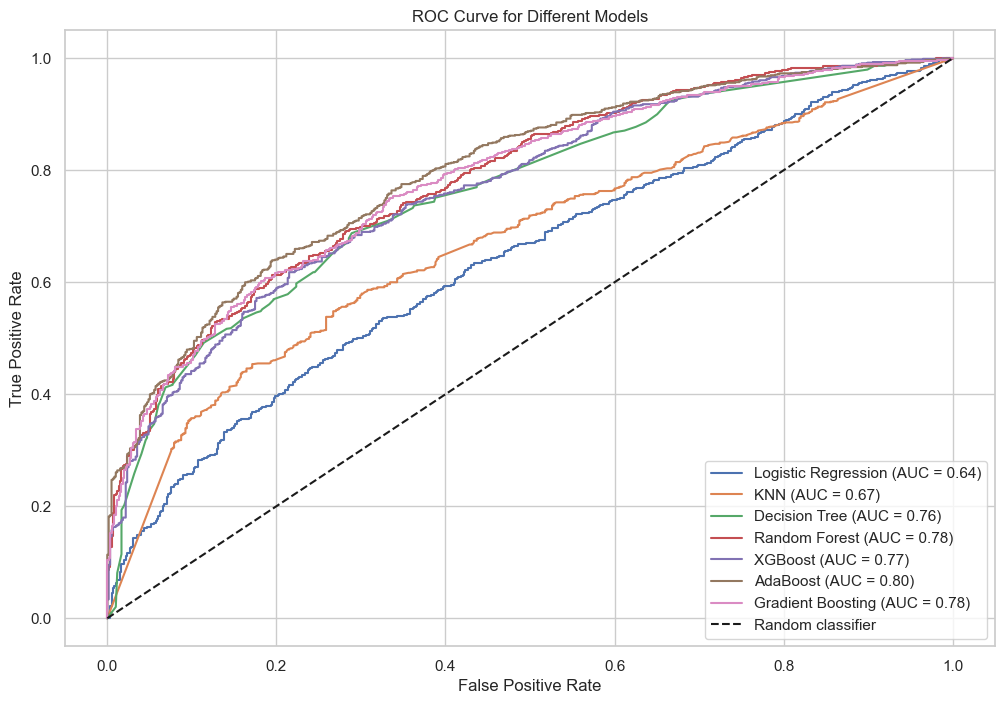

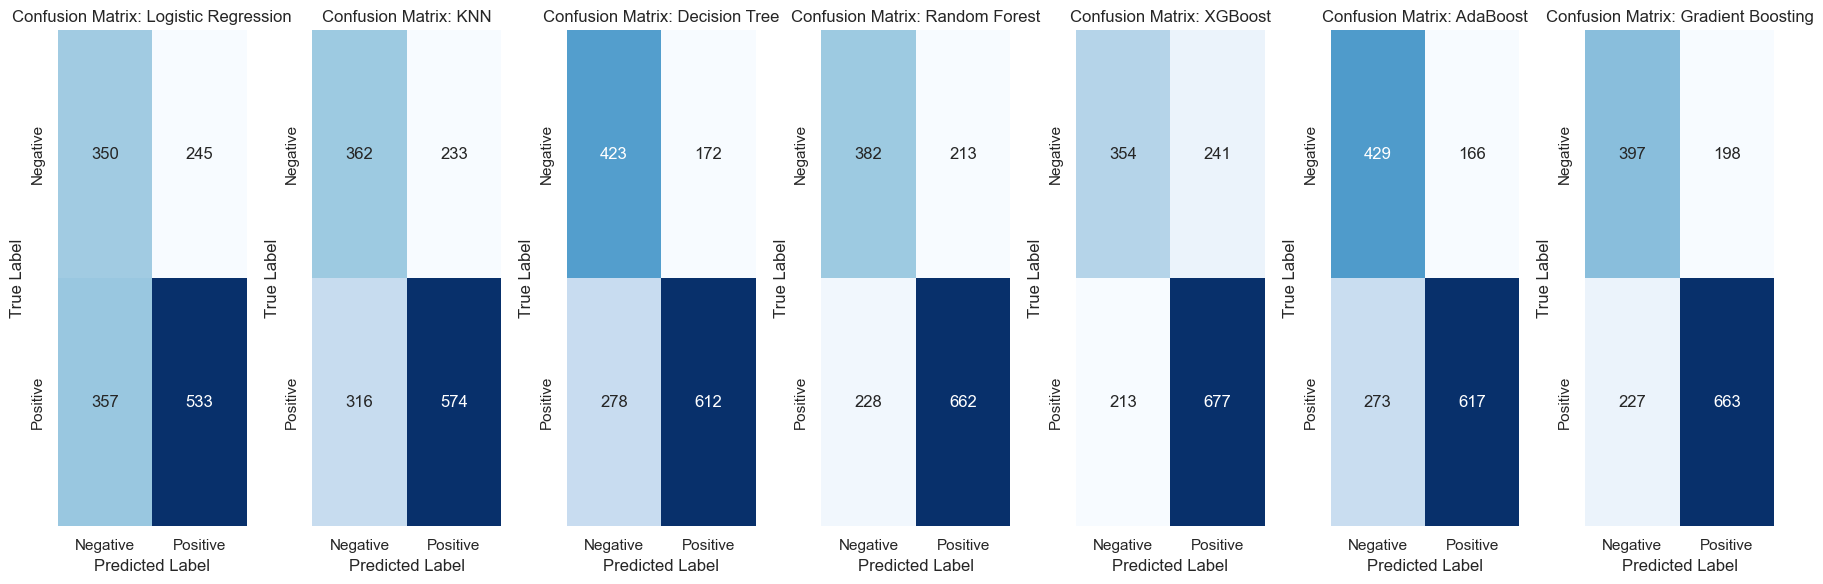

In [89]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import numpy as np

def plot_roc_curve(models, model_names, X_test, y_test):
    plt.figure(figsize=(12, 8))
    
    for model, name in zip(models, model_names):
        y_probs = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
    plt.title('ROC Curve for Different Models')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

def plot_confusion_matrices(models, model_names, X_test, y_test):
    num_models = len(models)
    fig, axes = plt.subplots(1, num_models, figsize=(18, 6))
    
    for i, (model, name) in enumerate(zip(models, model_names)):
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], ax=axes[i], cbar=False)
        axes[i].set_title(f'Confusion Matrix: {name}')
        axes[i].set_xlabel('Predicted Label')
        axes[i].set_ylabel('True Label')
    
    plt.tight_layout()
    plt.show()

models = [log_reg, knn_best, best_dt, best_rf, best_xgb, best_ada_boost, best_gbc]
model_names = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'AdaBoost', 'Gradient Boosting']

plot_roc_curve(models, model_names, X_test, y_test)
plot_confusion_matrices(models, model_names, X_test, y_test)


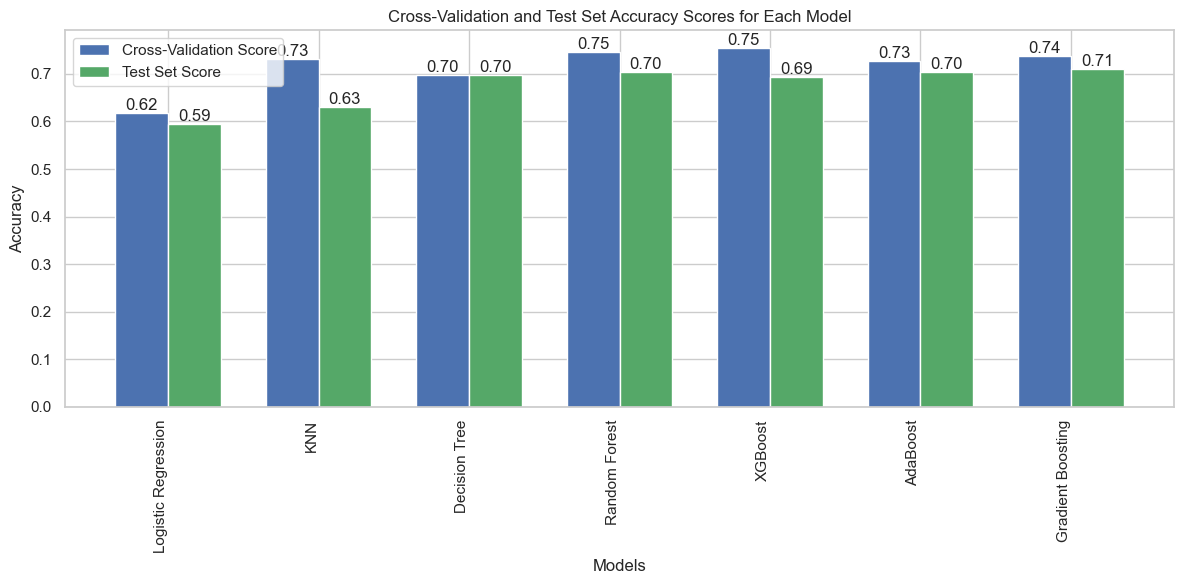

In [90]:
from sklearn.model_selection import cross_val_score

models = [log_reg, knn_best, best_dt, best_rf, best_xgb, best_ada_boost, best_gbc]
model_names = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'AdaBoost', 'Gradient Boosting']

cv_scores = []
test_scores = []

for model, name in zip(models, model_names):
    cv_scores_model = cross_val_score(model, X_smote, y_smote, cv=5, scoring='accuracy')
    mean_cv_score = np.mean(cv_scores_model)
    cv_scores.append(mean_cv_score)
    
    model.fit(X_smote, y_smote)
    
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    test_scores.append(test_accuracy)

x = np.arange(len(model_names))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))

bars1 = ax.bar(x - width / 2, cv_scores, width, label='Cross-Validation Score', color='b')
bars2 = ax.bar(x + width / 2, test_scores, width, label='Test Set Score', color='g')

ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Cross-Validation and Test Set Accuracy Scores for Each Model')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=90, ha='right')
ax.legend()

def add_value_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom')

add_value_labels(bars1)
add_value_labels(bars2)

plt.tight_layout()
plt.show()


## **Conclusion**  
After evaluating all the models, I have selected the AdaBoost classifier due to its strong performance on both the training and testing sets. The model shows a good balance between bias and variance, demonstrating its ability to generalize effectively. Furthermore, it achieves a high AUC, indicating excellent discriminatory power and reliable performance.
